<a href="https://colab.research.google.com/github/Prafull009/GenAI/blob/main/GenAIAssign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gaussian Mixture Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import datasets
from sklearn.mixture import GaussianMixture

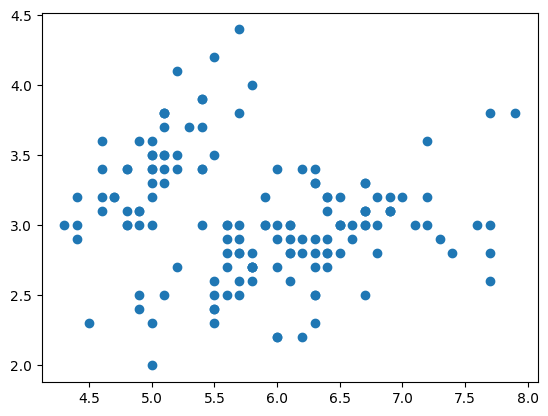

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2]
d = DataFrame(X)

plt.scatter(d[0], d[1])
plt.show()

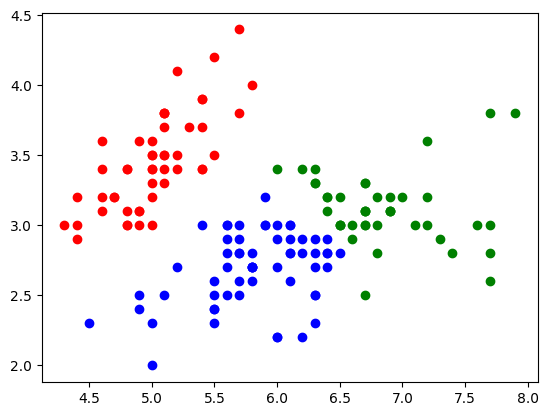

In [ ]:
gmm = GaussianMixture(n_components = 3)
gmm.fit(d)

labels = gmm.predict(d)
d['labels'] = labels
d0 = d[d['labels'] == 0]
d1 = d[d['labels'] == 1]
d2 = d[d['labels'] == 2]

plt.scatter(d0[0], d0[1], c = 'r')
plt.scatter(d1[0], d1[1], c = 'g')
plt.scatter(d2[0], d2[1], c = 'b')

Text Generator using Markov Chain

In [ ]:
!pip install markovify

ERROR: Could not find a version that satisfies the requirement warning (from versions: none)
ERROR: No matching distribution found for warning


In [ ]:
import spacy
import re
import markovify
import nltk
from nltk.corpus import gutenberg
import warnings
warnings.filterwarnings("ignore")

nltk.download('gutenberg')
!python -m spacy download en

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 86.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [ ]:
hamlet = gutenberg.raw('shakespeare-hamlet.txt')
macbeth = gutenberg.raw('shakespeare-macbeth.txt')
caeser = gutenberg.raw('shakespeare-caesar.txt')

print('\nRaw\n:', hamlet[:100])
print('\nRaw\n:', macbeth[:100])
print('\nRaw\n:', caeser[:100])


Raw
: [The Tragedie of Hamlet by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Barnardo a

Raw
: [The Tragedie of Macbeth by William Shakespeare 1603]


Actus Primus. Scoena Prima.

Thunder and Lig

Raw
: [The Tragedie of Julius Caesar by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Fla


In [ ]:
def clean_text(text):
  text = re.sub(r'--', ' ', text)
  text = re.sub(r'[\[].*?[\]]', ' ', text)
  text = re.sub(r'(\b|\s+\-?|^\-?)(\d+|\d*\.\d+)\b', ' ', text)
  text = ' '.join(text.split())
  return text

In [ ]:
hamlet = re.sub(r'Chapter \d+', '', hamlet)
macbeth = re.sub(r'Chapter \d+', '', macbeth)
caeser = re.sub(r'Chapter \d+', '', caeser)

hamlet = clean_text(hamlet)
macbeth = clean_text(macbeth)
caeser = clean_text(caeser)

In [ ]:
nlp = spacy.load('en_core_web_sm')
hamlet_doc = nlp(hamlet)
macbeth_doc = nlp(macbeth)
caeser_doc = nlp(caeser)

In [ ]:
hamlet_sents = ' '.join([sent.text for sent in hamlet_doc.sents if len(sent.text) > 1])
macbeth_sents = ' '.join([sent.text for sent in macbeth_doc.sents if len(sent.text) > 1])
caeser_sents = ' '.join([sent.text for sent in caeser_doc.sents if len(sent.text) > 1])

shakespeare_sents = hamlet_sents + macbeth_sents + caeser_sents
print(shakespeare_sents[:500])

Actus Primus. Scoena Prima. Enter Barnardo and Francisco two Centinels. Barnardo. Who's there? Fran. Nay answer me: Stand & vnfold your selfe Bar. Long liue the King Fran. Barnardo? Bar. He Fran. You come most carefully vpon your houre Bar. 'Tis now strook twelue, get thee to bed Francisco Fran. For this releefe much thankes: 'Tis bitter cold, And I am sicke at heart Barn. Haue you had quiet Guard? Fran. Not a Mouse stirring Barn. Well, goodnight. If you do meet Horatio and Marcellus, the Riuals


In [ ]:
generator = markovify.Text(shakespeare_sents, state_size = 3)

In [ ]:
for i in range(3):
  print(generator.make_sentence())

for i in range(3):
  print(generator.make_short_sentence(max_chars = 100))

None
None
I am so much a Foole, should I stay longer It would be spoke too Mar. Question it Horatio Hor.
Be rul'd, you shall not goe my Lord Ham.
I, my good Lord Polon.
None


In [ ]:
class POSifiedText(markovify.Text):
  def word_split(self, sentence):
    return ['::'.join((word.orth_, word.pos_)) for word in nlp(sentence)]

  def word_join(self, words):
    sentence = ' '.join(word.split('::')[0] for word in words)
    return sentence

generator_2 = POSifiedText(shakespeare_sents, state_size=3)

In [ ]:
for i in range(3):
  print(generator_2.make_sentence())

for i in range(3):
  print(generator_2.make_short_sentence(max_chars = 100))

That I did my Lord , Say I am merry ; Come to me againe , And not where I had arm'd them Laer .
None
None
Wife , Children , Seruants , all that I liue by , is with the King , the King your Father Ham .
All is confirm'd my Lord , what is Horatio there ?
And since the Quarrell Will beare no colour , for the dignity of the whole body Doct .
